<a href="https://colab.research.google.com/github/thezachdrake/UMD-INST760-Summer2024/blob/main/notebooks/Richardson-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.ticker import MultipleLocator

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [7]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


Your student lives in the United States currently.

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

Penelope lives in the US and wants to explore her options academically. She is open to studying abroad but she is very worried about finding a job after graduation. If she studies abroad, she wants it to be worth it.

**Is there a benefit to moving to a different country for school?**

Our overall list is pretty exhaustive, let's see the top 25 categorized by country.

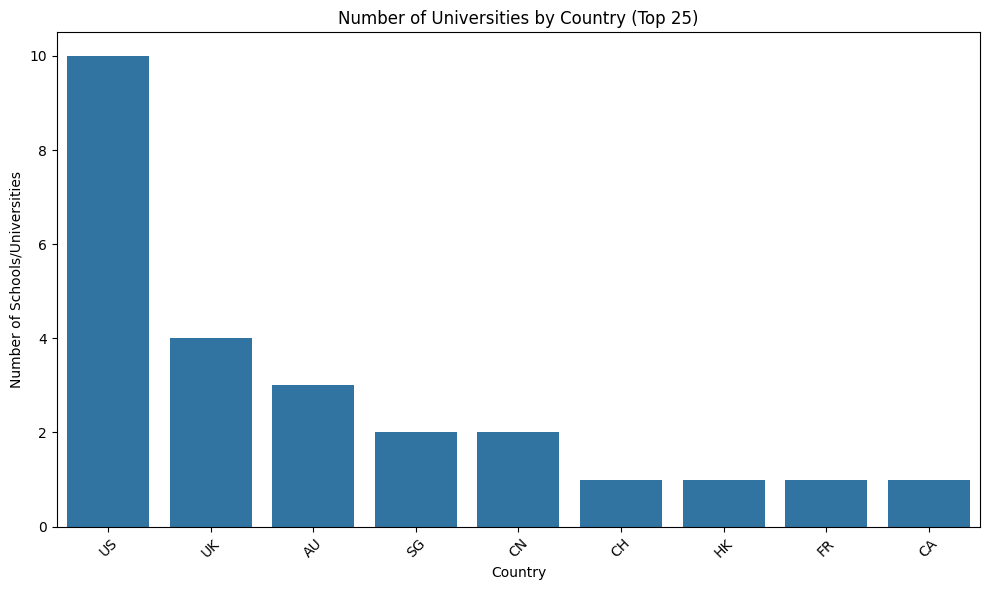

In [8]:
top_schools = df.head(25)
location_counts = top_schools['location'].value_counts().sort_values(ascending=False)
ordered_locations_by_count = location_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(data=top_schools, x='location', order=ordered_locations_by_count)
plt.title('Number of Universities by Country (Top 25)')
plt.xlabel('Country')
plt.ylabel('Number of Schools/Universities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows how many appear but does not necessarily reflect the employer reputation or employerability of the schools. Let's compare that relationship in the top 25 schools.

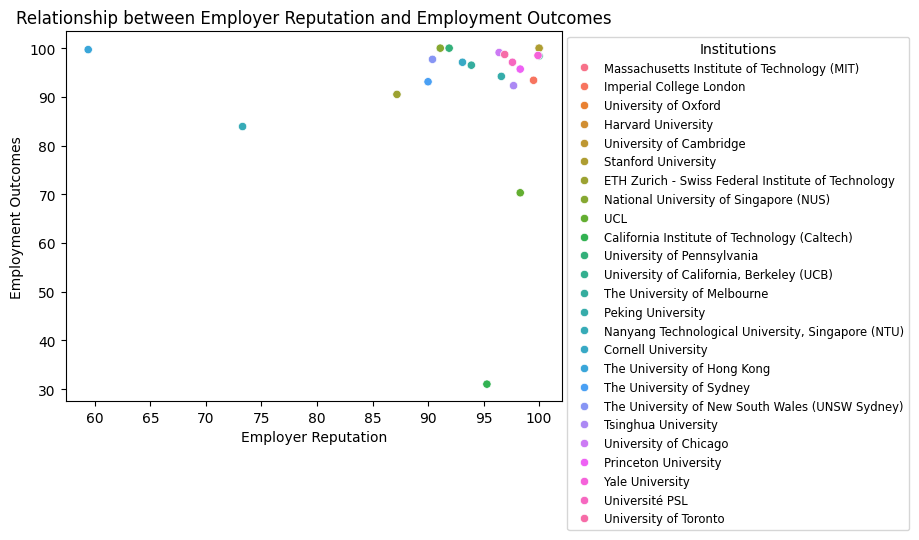

In [9]:
top_schools = df.head(25)
top_schools

sns.scatterplot(data=top_schools, x='employer_reputation', y='employment_outcomes', hue='institution_name')
plt.title('Relationship between Employer Reputation and Employment Outcomes')
plt.legend(title='Institutions', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', frameon=True)
plt.xlabel('Employer Reputation')
plt.ylabel('Employment Outcomes')
plt.show()

I used plotly for a more interactive experience *if you can't see it, please view in Colab*

In [10]:
fig = px.scatter(top_schools, x='employer_reputation', y='employment_outcomes', color='institution_name', hover_data=['institution_name'], title='Employability in Top 25 Schools')
fig.update_layout(
    legend_title_text='Institution Name',
    xaxis_title='Employer Reputation',
    yaxis_title='Employment Outcomes'
)
fig.show()

For the most part, if a school appears in the top 25, their employment outcomes and employer reputation are close with three outliers; University of Hong Kong, Nanyang Technological University, and California Institute of Technology.

Let's compare the top 25 schools that appear on the list based on location.

In [17]:
top_us_schools = top_schools[top_schools['location'] == 'US']
top_us_schools

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1
9,10,15,California Institute of Technology (Caltech),US,United States,S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,90.9
10,11,12,University of Pennsylvania,US,United States,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,90.3
11,12,10,"University of California, Berkeley (UCB)",US,United States,XL,100.0,100.0,23.5,98.2,91.5,61.0,97.2,98.4,100.0,90.1
15,16,13,Cornell University,US,United States,L,98.3,93.1,52.7,97.5,54.2,63.4,94.0,97.1,72.1,87.9
20,21,11,University of Chicago,US,United States,L,99.1,96.4,94.2,60.8,79.0,87.0,85.1,99.1,46.9,86.2
21,22,17,Princeton University,US,United States,M,99.8,98.3,57.0,100.0,9.6,56.6,78.3,95.7,51.5,85.5
22,23,16,Yale University,US,United States,L,99.9,99.9,100.0,38.6,91.5,63.3,93.9,98.5,92.2,85.2


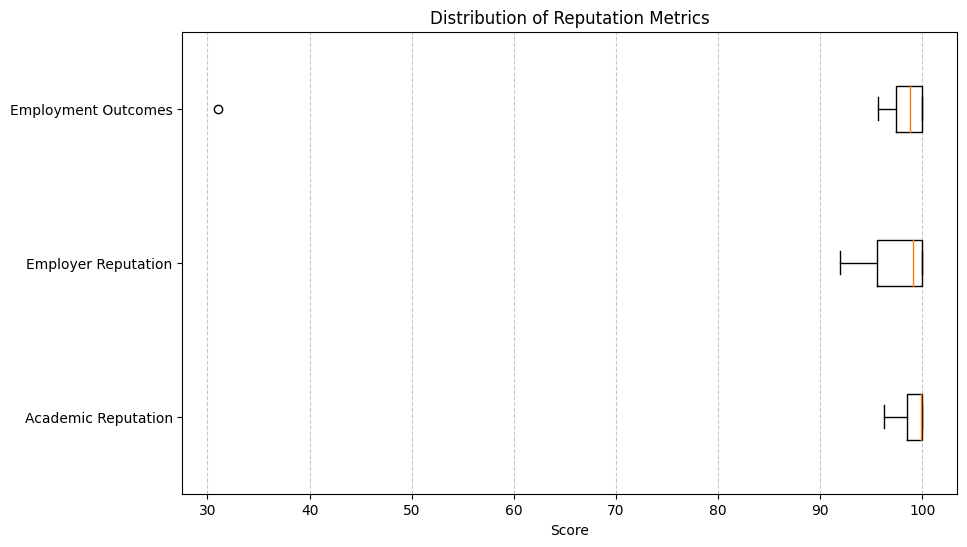

In [37]:
plt.figure(figsize=(10, 6))
plt.boxplot([top_us_schools['academic_reputation'], top_us_schools['employer_reputation'], top_us_schools['employment_outcomes']], labels=['Academic Reputation', 'Employer Reputation', 'Employment Outcomes'], vert=False)
plt.xlabel('Score')
_ = plt.title('Distribution of Reputation Metrics in US')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [14]:
top_int_schools = top_schools[top_schools['location'] != 'US']
top_int_schools

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,CH,Switzerland,L,98.8,87.2,65.9,97.9,100.0,98.6,95.7,90.5,98.8,93.9
7,8,8,National University of Singapore (NUS),SG,Singapore,XL,99.5,91.1,68.8,93.1,100.0,88.9,91.6,100.0,97.7,93.7
8,9,9,UCL,UK,United Kingdom,XL,99.5,98.3,95.9,72.2,99.0,100.0,99.9,70.3,74.8,91.6
12,13,14,The University of Melbourne,AU,Australia,XL,98.5,93.9,15.4,93.0,95.1,99.8,97.4,96.5,99.6,88.9
13,14,17,Peking University,CN,China (Mainland),XL,99.5,96.6,92.6,97.7,50.3,23.6,79.8,94.2,46.9,88.5
14,15,26,"Nanyang Technological University, Singapore (NTU)",SG,Singapore,L,91.9,73.3,80.6,92.4,100.0,83.5,89.4,83.9,95.6,88.4
16,17,26,The University of Hong Kong,HK,Hong Kong SAR,L,97.4,59.4,81.2,86.4,100.0,99.3,81.4,99.7,89.2,87.6


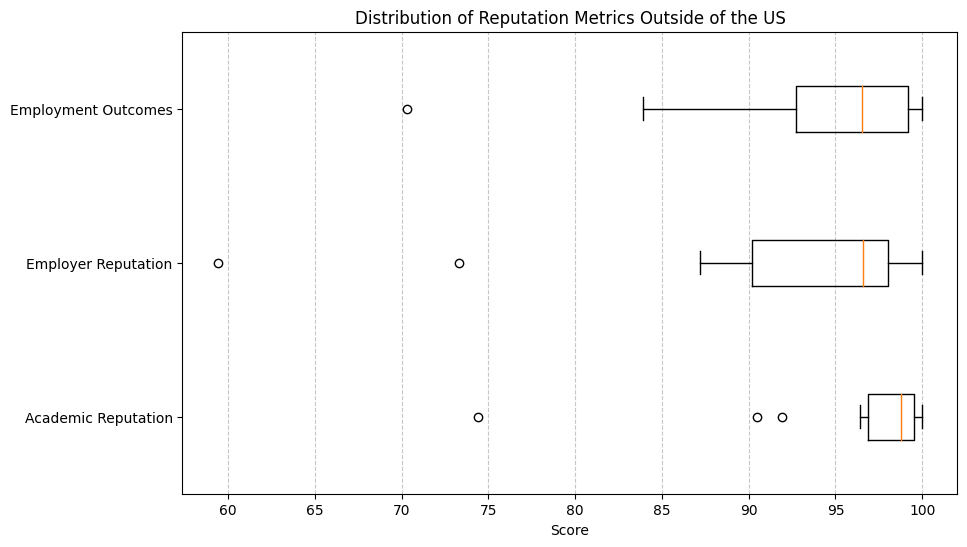

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot([top_int_schools['academic_reputation'], top_int_schools['employer_reputation'], top_int_schools['employment_outcomes']], labels=['Academic Reputation', 'Employer Reputation', 'Employment Outcomes'], vert=False)
plt.xlabel('Score')
_ = plt.title('Distribution of Reputation Metrics Outside of the US')
plt.grid(axis='x', linestyle='--', alpha=0.7)



Do larger schools invest more in reducing their environmental impact?

Text(0.5, 0.98, 'Distribution of Sustainability Scores by School Size')

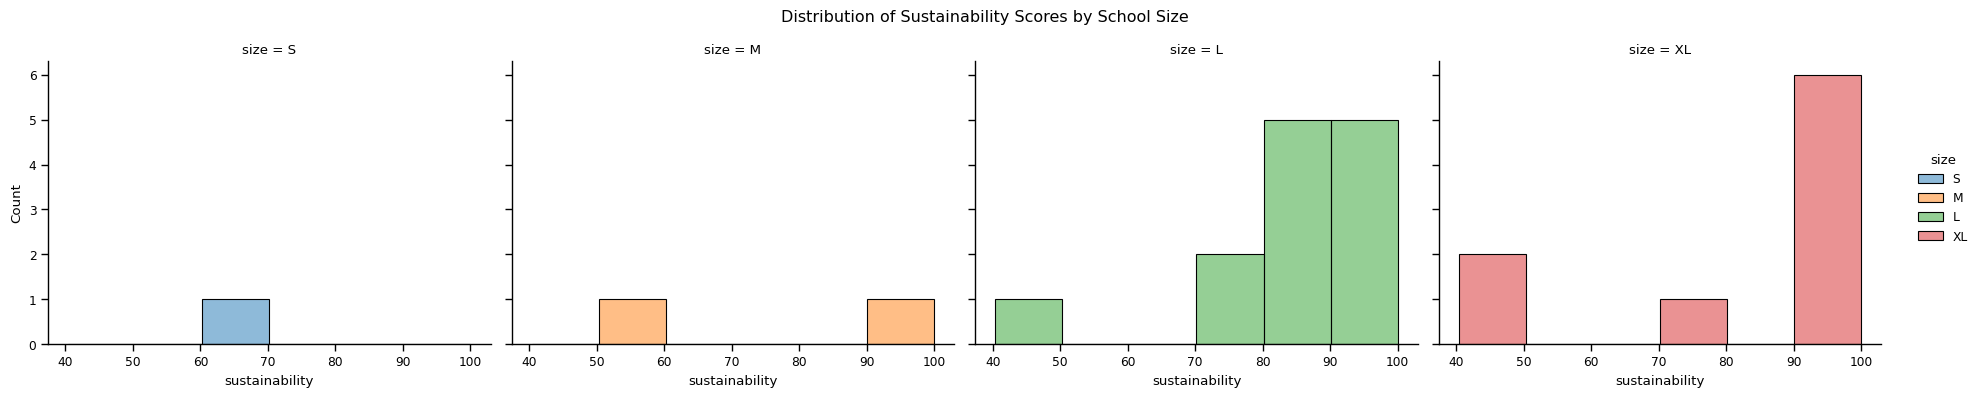

In [90]:
desired_legend_order = ['S', 'M', 'L', 'XL']

g = sns.displot(data=top_schools, x="sustainability", hue="size", col="size", col_order=['S', 'M', 'L', 'XL'], hue_order=desired_legend_order, legend=True, height=4, aspect=1.2)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Sustainability Scores by School Size')



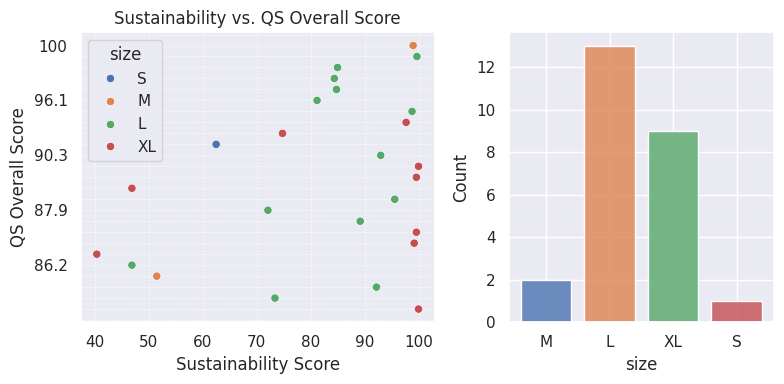

In [132]:
sns.set_theme()
sns.set_context("notebook")

# create subplots
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

# scatter plot
sns.scatterplot(
    data=top_schools,
    x="sustainability",
    y="qs_overall_score",
    hue="size",
    hue_order=desired_legend_order,
    ax=axs[0])


axs[0].yaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 5 units
axs[0].yaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 1 unit
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

#set labels
axs[0].set_xlabel('Sustainability Score')
axs[0].set_ylabel('QS Overall Score')
axs[0].set_title('Sustainability vs. QS Overall Score')

# histogram plot
sns.histplot(data=top_schools, x="size", hue="size", shrink=.8, alpha=.8, legend=False, ax=axs[1])

#adjust layout
f.tight_layout()


Does this impact overall quality?

Will they be presented with opportunities to learn from other cultures as well as their own?